In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

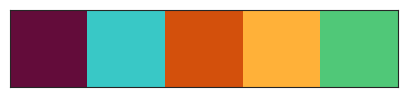

In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139','#50C878']
sns.set_palette(customPalette)
sns.palplot(customPalette)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [25]:
voices = pd.read_csv("voice.csv")
# 'Group','M/F',
Gender_mapping = {'male':0, 'female':1}
voices = voices.replace({'label':Gender_mapping})
voices = voices.drop(["maxdom","mindom", "dfrange", "meandom", "mode", "maxfun", "minfun", "modindx", "skew","Q75","kurt"],axis = 1)

voices = voices.dropna()
print(voices.describe())
from sklearn import preprocessing


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','centroid','meanfun']
voices[features] = scaler.fit_transform(voices[features].to_numpy())

voices = voices.dropna()
voices_2 = voices.copy()

voices = voices.drop(['label'],axis=1)
#voices = voices.drop(['M/F'],axis=1)
#Plot all the columns in the voices data set
print(len(voices))


print(voices.describe())
'''
voices.hist(bins=50,figsize=(20,15))

plt.show()
'''

          meanfreq           sd       median          Q25          IQR  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.084309   
std       0.029918     0.016652     0.036360     0.048680     0.042783   
min       0.039363     0.018363     0.010975     0.000229     0.014558   
25%       0.163662     0.041954     0.169593     0.111087     0.042560   
50%       0.184838     0.059155     0.190032     0.140286     0.094280   
75%       0.199146     0.067020     0.210618     0.175939     0.114175   
max       0.251124     0.115273     0.261224     0.247347     0.252225   

            sp.ent          sfm     centroid      meanfun        label  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.895127     0.408216     0.180907     0.142807     0.500000  
std       0.044980     0.177521     0.029918     0.032304     0.500079  
min       0.738651     0.036876     0.039

'\nvoices.hist(bins=50,figsize=(20,15))\n\nplt.show()\n'

In [ ]:


#Doesn't work because of missing values and might need to convert M/F t 0 and 1 same for groups

voices_aspects = voices.copy()
print(voices_aspects)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(voices_aspects)

from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(voices_aspects)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(voices_aspects)

pc = pd.DataFrame(principal_components)
pc['labels'] = y_kmeans
pc.columns = ['x', 'y','labels']

#plot data with seaborn
sns.lmplot(data=pc, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True)
#plt.show()

from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions

tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(voices_aspects)


ts = pd.DataFrame(tsne_components)
ts['labels'] = y_kmeans
ts.columns = ['x', 'y','labels']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True)

print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=voices_aspects.columns,index = ['PC-1','PC-2']))

voices['labels'] = y_kmeans
voices_2['labels'] = y_kmeans
# shuffle dataset

voices = voices.sample(frac=1)
print(voices['labels'].value_counts())

#Printing out 10 of the bottom datapoints in each cluster and the mean of each cluster
print(voices[voices['labels'] == 0].tail(10))
print(voices_2[voices_2['labels'] == 0].mean())

print(voices[voices['labels'] == 1].tail(10))
print(voices_2[voices_2['labels'] == 1].mean())

'''
print(voices[voices['label'] == 2].tail(10))
print(voices_2[voices_2['label'] == 2].mean())

print(voices[voices['label'] == 3].tail(10))
print(voices_2[voices_2['label'] == 3].mean())

print(voices[voices['label'] == 4].tail(10))
print(voices_2[voices_2['label'] == 4].mean())
'''
'''
voices[voices['labels']==0].hist()
voices[voices['labels']==1].hist()

voices[voices['label']==2].hist()
voices[voices['label']==3].hist()
voices[voices['label']==4].hist()
'''

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.35680649 0.11244791]
[0.67834647 0.21378154]
[0.67834647 0.89212801]
      meanfreq        sd    median       Q25       IQR    sp.ent       sfm  \
PC-1 -0.149218  0.211318 -0.131140 -0.254841  0.241958  0.217913  0.239939   
PC-2 -0.284794  0.272319 -0.260474 -0.319759  0.169162  0.235238  0.437466   

      centroid   meanfun     label  
PC-1 -0.149218 -0.251603 -0.775737  
PC-2 -0.284794  0.095828  0.555898  
1    1184
3     953
0     631
2     400
Name: labels, dtype: int64
meanfreq    0.503914
sd          0.566980
median      0.526252
Q25         0.353621
IQR         0.450908
sp.ent      0.798734
sfm         0.706692
centroid    0.503914
meanfun     0.274381
label       0.000000
labels      0.000000
dtype: float64
meanfreq    0.774091
sd          0.227924
median      0.779638
Q25         0.757291
IQR         0.105105
sp.ent      0.472910
sfm         0.273754
centroid    0.774091
meanfun     0.635081
label       1.000000
labels      1.000000
dtype: float64
meanfreq    0.544349
sd

"\nprint(voices_2[voices_2['labels'] == 5].mean())\n\nprint(voices_2[voices_2['labels'] == 6].mean())\n"

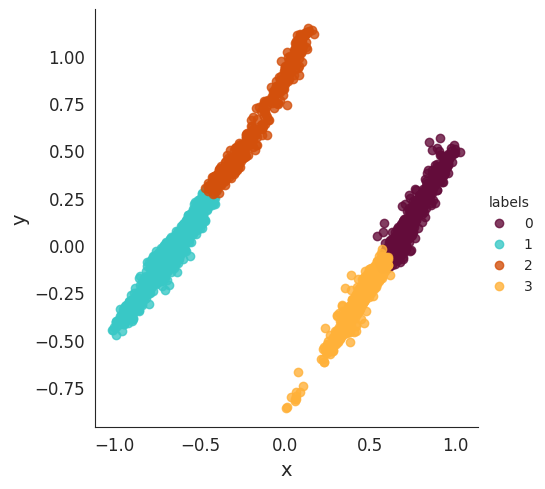

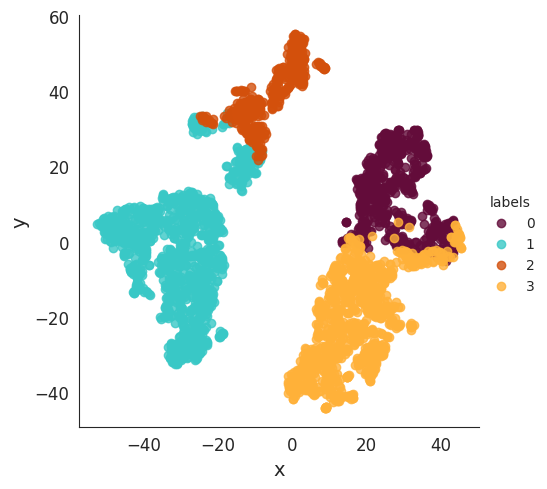

In [26]:
#Doesn't work because of missing values and might need to convert M/F t 0 and 1 same for groups

voices_aspects = voices_2.copy()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(voices_aspects)

from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(voices_aspects)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(voices_aspects)

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','labels']

#plot data with seaborn
sns.lmplot(data=pc, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True)
#plt.show()

from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions

tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(voices_aspects)


ts = pd.DataFrame(tsne_components)
ts['labels'] = y_kmeans
ts.columns = ['x', 'y','labels']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True)

print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=voices_aspects.columns,index = ['PC-1','PC-2']))

voices['labels'] = y_kmeans
voices_2['labels'] = y_kmeans
# shuffle dataset

voices = voices.sample(frac=1)
print(voices['labels'].value_counts())

#Printing out 10 of the bottom datapoints in each cluster and the mean of each cluster

print(voices_2[voices_2['labels'] == 0].mean())

print(voices_2[voices_2['labels'] == 1].mean())

print(voices_2[voices_2['labels'] == 2].mean())

print(voices_2[voices_2['labels'] == 3].mean())

print(voices_2[voices_2['labels'] == 4].mean())
'''
print(voices_2[voices_2['labels'] == 5].mean())

print(voices_2[voices_2['labels'] == 6].mean())
'''